In [20]:
import sys
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from skimage.transform import downscale_local_mean
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import TruncatedSVD
from scipy.spatial import distance
from sklearn.preprocessing import Binarizer,Normalizer


In [21]:
def assign_center(train_data, k):
    centers = []
    centers.append(train_data[np.random.randint(train_data.shape[0]), :])
    as_id = 0
    while as_id < (k - 1):
        dist_arr = []
        for i in range(train_data.shape[0]):
            value = train_data[i, :]
            d = sys.maxsize
            for j in range(len(centers)):
                temp_dist = np.sum((value - centers[j]) ** 2)
                if(d<temp_dist):
                    d = d
                if(d>temp_dist):
                    d=temp_dist
            dist_arr.append(d)
        as_id+=1
        dist_arr = np.array(dist_arr)
        new_centroid = train_data[np.argmax(dist_arr), :]
        centers.append(new_centroid)
        dist_arr = []
    return centers

In [22]:
def KMeans_implementation(Y):
    rv = np.random.RandomState(2)
    Y = np.array(Y)
    i = rv.permutation(Y.shape[0])[:3]
    centroids = assign_center(Y,3)
    centroids = np.array(centroids)
    while True:
        temp = []
        distance_points = distance.cdist(Y, centroids)
        for i in distance_points:
            temp.append(np.where(i == i.min())[0][0])
        clusters = np.asarray(temp)
        new_centers = np.array([Y[clusters == i].mean(0) for i in range(3)])
        if np.all(centroids == new_centers):
            break
        centroids = new_centers
    return clusters

In [23]:
train = []
for line in open('test_file.txt'):
    d=line.split("\n")
    for a in d:
        if a!="":
            i=0
            for i in range(0,3):
                temp=a.split(" ")
                temp[i]=float(temp[i])
                train.append(temp)
train = Normalizer(norm='max').fit_transform(np.array(train).astype(np.float64))
labels = KMeans_implementation(train)

In [24]:
f = open("part1.txt", "w")
for a in labels:
    f.write(str(a+1))
    f.write("\n") 
f.close()

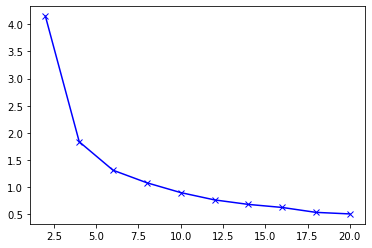

In [25]:
sum_of_square=[]
k = range(2,22,2)
for i in range(2,22,2):
    kmeans = KMeans_implementation(train)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(train)
    sum_of_square.append(kmeans.inertia_) 
plt.plot(k, sum_of_square, 'bx-')
plt.show()